* https://www.kaggle.com/sunmiyoon/one-hour-analysis-written-in-both-eng-and-kor/comments#290148 를 따라하기
* https://www.kaggle.com/primaryobjects/voicegender
* https://pandas.pydata.org/pandas-docs/stable/10min.html

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("."))

['lab5-2.ipynb', 'TODO', 'lab7-2.ipynb', 'lab7-ex.ipynb', 'lab9-ex2.py', 'udacity', 'lab11-class.ipynb', 'screenshot', 'lab11-1.ipynb', 'lab6-1.ipynb', 'calc.py', 'lab12-1.ipynb', 'lab9_gpu.py', 'rnn_mnist_1.py', 'lab4-2.ipynb', 'lab4-1.py', '1_notmnist.py', 'lab11-ex.ipynb', 'lab4-2.py', 'voice.csv', 'lab11-ensemble.ipynb', 'softmax classifier.pdf', '.gitignore', 'hello_tf.py', 'lab12-2.ipynb', 'rnn_mnist_simple.ipynb', 'lab8.ipynb', 'lab6-2.ipynb', 'tensorflow:1_notmnist.ipynb.pdf', 'example', 'MNIST_data', 'gender_by_voice.ipynb', 'machine_info.ipynb', 'lab11-3.ipynb', '1_notmnist.ipynb', 'lab9-ex.ipynb', 'lab4-4.ipynb', 'lab9-ex3.py', 'lab11-2.ipynb', 'DeepLearningZeroToAll', 'lab11_2_deep.py', 'rnn_cnn_mlist_class.py', 'lab7-1.ipynb', 'lab4-1.ipynb', 'softmax.png', 'doc', 'lab5-1.ipynb', '.ipynb_checkpoints', 'lab9-3.py', 'lab2-1.py', 'lab3.py', 'Lab', 'softmax.py', 'lab5-ex.ipynb', 'passwd.py', 'Lecture', 'logs', 'notMNIST', 'lab9-2.ipynb', 'rnn_cnn_mnist.py', 'lab9-1.ipynb', 'te

data를 읽은 후,

label로부터 gender(float64)를 만들고,
train set과 test set으로 나눈다.

In [45]:
_data = pd.read_csv('./voice.csv')
v_data = _data.reindex(columns=list(_data.columns) + ['gender'])
#v_data.dtypes
_len = len(v_data)
print(_len)
print(v_data.at[3167, 'label'])
for i in range(_len):
    if v_data.at[i, 'label'] == 'male':
        v_data.at[i, 'gender'] = 1.0
    else:
        v_data.at[i, 'gender'] = 0.0
print(v_data.at[3167, 'gender'])
v_data = v_data.drop(['label'], axis=1)
# shuffling
v_data = v_data.reindex(np.random.permutation(v_data.index))
print(len(v_data.columns), v_data.columns)
_split = _len - 1000
train = v_data[0:_split]
test = v_data[_split:-1]
print(len(train), len(test))

3168
female
0.0
21 Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'gender'],
      dtype='object')
2168 999


Data scanning
데이터 스캔

분석 전에 날것의 데이터를 그대로 스캔하는 것이 중요합니다. 어떤 변수들이 들어있고, 각자의 데이터 타입은 무엇인지, 어떤 변수는 dummy로 사용하고 어떤 변수는 numerical 로 사용 할 것인지 염두해 두면서 데이터를 스캔합니다.

In [29]:
print(train.tail(2))
# print(test.head(2))
# print(v_data.tail(2))
# print(test.tail(2))
# v_data.size
# v_data.columns

      meanfreq        sd    median       Q25       Q75       IQR      skew  \
811   0.173202  0.064381  0.182496  0.111310  0.217011  0.105701  1.539900   
1033  0.200977  0.057683  0.219333  0.148711  0.246400  0.097689  1.266136   

          kurt    sp.ent       sfm   ...    centroid   meanfun    minfun  \
811   5.533414  0.933333  0.567318   ...    0.173202  0.104842  0.047572   
1033  4.493445  0.924651  0.366638   ...    0.200977  0.119180  0.047337   

        maxfun   meandom    mindom    maxdom   dfrange   modindx  gender  
811   0.271186  0.881250  0.023438  6.632812  6.609375  0.146080     1.0  
1033  0.279070  0.916903  0.023438  7.078125  7.054688  0.058929     1.0  

[2 rows x 21 columns]


Summary Statistics
요약 통계

In [30]:
print(train.describe())

          meanfreq           sd       median          Q25          Q75  \
count  2168.000000  2168.000000  2168.000000  2168.000000  2168.000000   
mean      0.180673     0.057244     0.185414     0.139914     0.224673   
std       0.029869     0.016726     0.036218     0.048991     0.023491   
min       0.039363     0.018363     0.013588     0.000229     0.042946   
25%       0.163413     0.042225     0.169391     0.110535     0.208500   
50%       0.184357     0.059117     0.189569     0.140000     0.225615   
75%       0.198948     0.067177     0.210401     0.175939     0.243240   
max       0.249637     0.115273     0.260541     0.242124     0.269852   

               IQR         skew         kurt       sp.ent          sfm  \
count  2168.000000  2168.000000  2168.000000  2168.000000  2168.000000   
mean      0.084759     3.181420    37.650180     0.895163     0.409337   
std       0.043312     4.357325   138.563244     0.045040     0.178234   
min       0.014922     0.285020     2

Correlation matrix

First I see the correlation matrix to see the rough relationships between features(variables). If there is strong relationship between independent variables (Xs on the right side), we could not trust the coefficient of them. It could be under-estimated or over-estimated than a real effect to dependent variable(Y on the left side).
첫번째로, 상관관계 테이블을 이용하여 변수들간의 상관관계를 살펴봅니다. 만약 독립변수(Xs)들 간에 상관관계가 높다면 회귀분석의 결과(coefficient)를 신뢰하기가 힘들어 집니다. 예를 들면, A라는 변수와 B라는 두 독립변수의 상관관계가 매우 높다면 A의 계수를 온전히 A가 Y에 미치는 영향이라고 해석하기 어렵습니다.

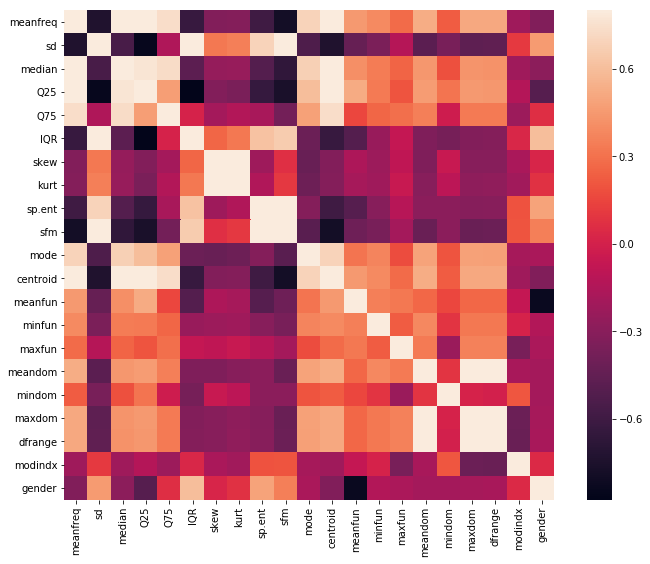

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(train.corr(), vmax=.8, square=True);

In [23]:
v_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
gender      0
dtype: int64

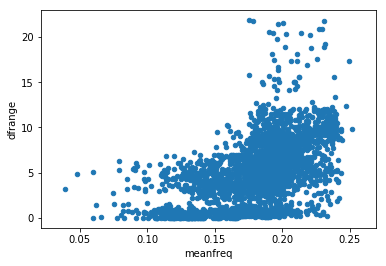

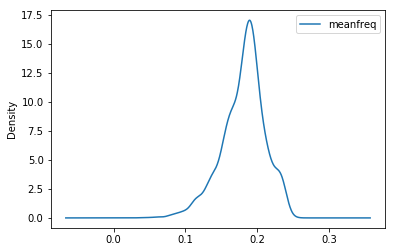

In [32]:
import warnings
warnings.filterwarnings("ignore")
import seaborn
v_data.head()
v_data.plot(kind='scatter', x='meanfreq', y='dfrange')
v_data.plot(kind='kde', y='meanfreq')
#seaborn.pairplot(v_data['meanfreq', 'sd', 'skew'], hue='label', size=2)

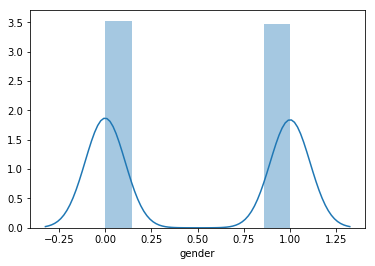

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

# I think this graph is more elegant than pandas.hist()
# train['SalePrice'].hist(bins=100)
sns.distplot(train['gender'])

In [56]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(834)  # for reproducibility

# collect data
x_data = train.loc[:,['meanfreq', 'sd', 'Q75','IQR','kurt','sp.ent']].values
y_data = train.loc[:,['gender']].values
x_test = test.loc[:,['meanfreq', 'sd', 'Q75','IQR','kurt','sp.ent']].values
y_test = test.loc[:,['gender']].values

In [47]:
print(x_data[0],y_data[0])
#len(x_data)
type(x_data)
#y_data

[0.14897454 0.08724326 0.21794459 0.16714924 8.35281475 0.93900675] [0.]


numpy.ndarray

In [64]:
X = tf.placeholder(tf.float32, shape=[None, 6])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([6, 4]), name='weight')
b = tf.Variable(tf.random_normal([4]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
layer1 = tf.nn.relu(tf.matmul(X, W) + b)

W2_1 = tf.Variable(tf.random_normal([4, 1]), name='weight2_1')
b2_1 = tf.Variable(tf.random_normal([1]), name='bias2_1')

#hypothesis = tf.nn.relu(tf.matmul(layer1, W2_1) + b2_1)
hypothesis = tf.sigmoid(tf.matmul(layer1, W2_1) + b2_1)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [65]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    cost_val, _ = sess.run([cost, optimizer], feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        print(step, cost_val)

h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_test, Y: y_test})
print("Accuracy: ", a)

0 0.36023393
100 0.34740213
200 0.3356741
300 0.32491046
400 0.31497908
500 0.3057713
600 0.2971972
700 0.2891893
800 0.28167394
900 0.27460542
1000 0.26792026
1100 0.2615945
1200 0.25559407
1300 0.24989347
1400 0.2444609
1500 0.23926944
1600 0.2343022
1700 0.22954671
1800 0.22498623
1900 0.22060624
Accuracy:  0.45445445
